In [152]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as dist
from scipy.io import wavfile
import IPython.display as ipyd
import librosa
import librosa.display
import soundfile as sf
import seaborn as sns
from matplotlib.patches import ConnectionPatch


def remove_trailing_silence(audio_file):
    audio, sr = librosa.load(audio_file, sr= 32000, mono=True)
    clip = librosa.effects.trim(audio, top_db= 20)
    sf.write('filtered.wav', clip[0], 32000)
    

def getMel(f_s, x):
    n_fft = int(0.025*f_s)      # 25 ms
    hop_length = int(0.01*f_s)  # 10 ms
    mel_spec_x = librosa.feature.melspectrogram(
        x/1.0, sr=f_s, n_mels=40,
        n_fft=n_fft, hop_length=hop_length
        )
    log_mel_spec_x = np.log(mel_spec_x)
    x_seq = log_mel_spec_x.T
    return x_seq

def dtw(dist_mat):

    N, M = dist_mat.shape

    # Initialize the cost matrix
    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf

    # Fill the cost matrix while keeping traceback information
    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],  # match (0)
                cost_mat[i, j + 1],  # insertion (1)
                cost_mat[i + 1, j]]  # deletion (2)
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    # Traceback from bottom right
    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            # Match
            i = i - 1
            j = j - 1
        elif tb_type == 1:
            # Insertion
            i = i - 1
        elif tb_type == 2:
            # Deletion
            j = j - 1
        path.append((i, j))

    # Strip infinity edges from cost_mat before returning
    cost_mat = cost_mat[1:, 1:]
    return path[::-1], cost_mat

def getCost(x_seq, y_seq):
    M = y_seq.shape[0]
    N = x_seq.shape[0]
    dist_mat = dist.cdist(x_seq, y_seq, "cosine")
    path, cost_mat = dtw(dist_mat)
    cost_mat_normalized = cost_mat / (M + N)

    return path, cost_mat, cost_mat_normalized

def splitSegments(seg_length, x, y, step_size):
    step_num = 0
    x_length = x.shape[0]
    y_length = y.shape[0]
    x_segments = []
    y_segments = []
    while (step_num*step_size+seg_length <= x_length):
        x_segments.append(x[step_num*step_size:step_num*step_size+seg_length])
        step_num+=1
    step_num = 0
    while (step_num*step_size+seg_length <= y_length):
        y_segments.append(y[step_num*step_size:step_num*step_size+seg_length])
        step_num+=1
    return x_segments, y_segments

def segmental_cost_mat(x_seg, y_seg):
    N=len(x_seg)
    M=len(y_seg)
    print(N)
    print(M)
    cost_mat = np.zeros((N, M))
    print(cost_mat.shape)
    for i in range(N):
        for j in range(M):
            path, cost_mat_non_norm, cost_mat_normalized = getCost(x_seg[i], y_seg[j])
            cost_mat[i, j] = 1/(cost_mat_normalized[-1, -1].tolist())
    return cost_mat

def k_nearest(cost_mat, k):
    nearest_max=[]
    for i in range(k):
        max_index = np.where(cost_mat == np.amax(cost_mat))
        max_index = list(zip(max_index[0], max_index[1]))
        cost_mat[max_index[0][0],max_index[0][1]] = 0
        nearest_max.append(max_index[0])
    return nearest_max

def identified_segment(x_seg, y_seg, nearest_max, k):
    i = nearest_max[k][0]
    j = nearest_max[k][1]
    x_kseg = x[step_num*step_size:step_num*step_size+seg_length]
    
def getScaled(num_costs, num):
    max_cost_len=max(num_costs)
    div=max_cost_len/float(num_costs[num]-1)
    print(div)
    x=[0]
    for i in range(1,num_costs[num]):
        x.append(i*div)
    return x

32000
S before T
(40, 95)
S after T
(95, 40)
32000
S before T
(40, 66)
S after T
(66, 40)
float64


C:\Users\Hanz\AppData\Local\Temp\ipykernel_11068\2898234333.py:10: FutureWarning: Pass y=[ 147.  118.  142. ... -182. -243. -265.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_x = librosa.feature.melspectrogram(
C:\Users\Hanz\AppData\Local\Temp\ipykernel_11068\2898234333.py:35: FutureWarning: Pass y=[147. 205. 234. ...  29.  25.   8.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_y = librosa.feature.melspectrogram(


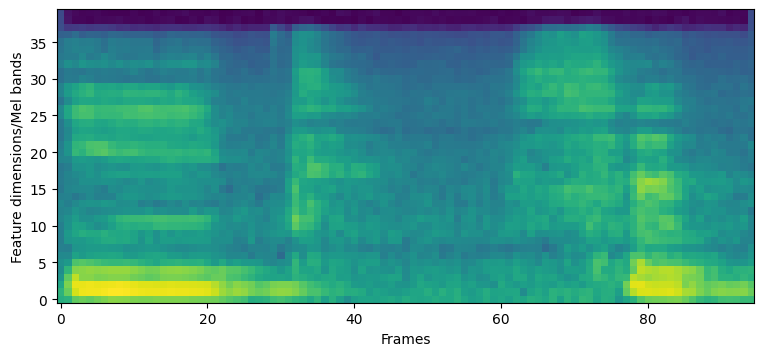

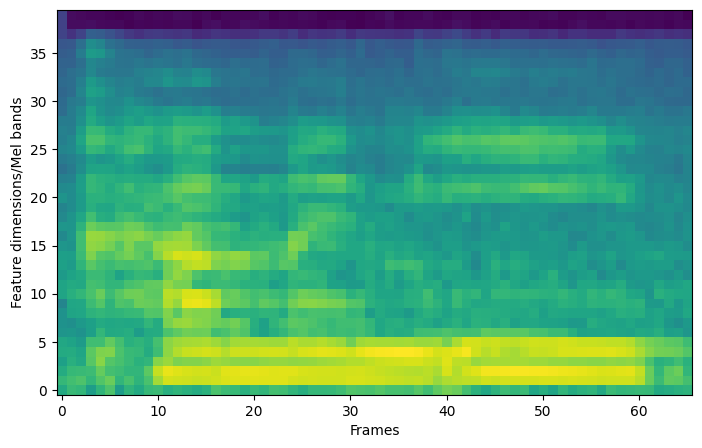

In [153]:
filtered = 'filtered.wav'

x_fn = "eat_sentance3.wav"
remove_trailing_silence(x_fn)
f_s, x = wavfile.read(filtered)
print(f_s)
# Mel-scale spectrogram
n_fft = int(0.025*f_s)      # 25 ms
hop_length = int(0.01*f_s)  # 10 ms
mel_spec_x = librosa.feature.melspectrogram(
    x/1.0, sr=f_s, n_mels=40,
    n_fft=n_fft, hop_length=hop_length
    )
log_mel_spec_x = np.log(mel_spec_x)
x_seq = log_mel_spec_x.T

print("S before T")
print(log_mel_spec_x.shape)
print("S after T")
print(x_seq.shape)

# Plot log-Mel spectrogram
fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(log_mel_spec_x, origin="lower", interpolation="nearest");
plt.ylabel("Feature dimensions/Mel bands")
plt.xlabel("Frames");

y_fn = "come_and_eat.wav"
remove_trailing_silence(y_fn)
f_s, y = wavfile.read(filtered)
print(f_s)
# Mel-scale spectrogram
n_fft = int(0.025*f_s)      # 25 ms
hop_length = int(0.01*f_s)  # 10 ms
mel_spec_y = librosa.feature.melspectrogram(
    y/1.0, sr=f_s, n_mels=40,
    n_fft=n_fft, hop_length=hop_length
    )
log_mel_spec_y = np.log(mel_spec_y)
y_seq = log_mel_spec_y.T

print("S before T")
print(log_mel_spec_y.shape)
print("S after T")
print(y_seq.shape)
print(y_seq.dtype)

# Plot log-Mel spectrogram
fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(log_mel_spec_y, origin="lower", interpolation="nearest");
plt.ylabel("Feature dimensions/Mel bands")
plt.xlabel("Frames");

In [154]:
seg_length=25
step_size=3
x_segments, y_segments = splitSegments(seg_length, x_seq, y_seq, step_size)
N=len(x_segments)
M=len(y_segments)

In [155]:
segmental_cost_mat=segmental_cost_mat(x_segments, y_segments)
print(type(segmental_cost_mat))

24
14
(24, 14)
<class 'numpy.ndarray'>


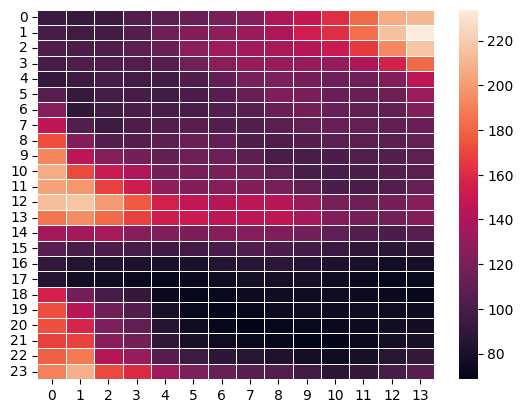

In [156]:
ax = sns.heatmap(segmental_cost_mat, linewidth=0.5)
plt.show()

In [157]:
nearest_max = k_nearest(segmental_cost_mat, 5)
print(nearest_max)

[(1, 13), (12, 1), (2, 13), (1, 12), (12, 0)]


Alignment cost: 254.6227


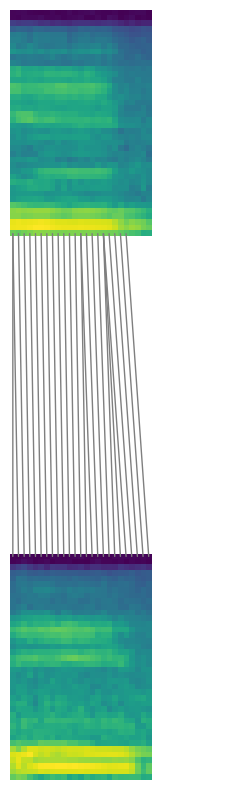

In [176]:
k=0
x_kseg=x_segments[nearest_max[k][0]].T
y_kseg=y_segments[nearest_max[k][1]].T
path, cost_mat, cost_mat_normalized = getCost(x_kseg, y_kseg)
print("Alignment cost: {:.4f}".format(1/cost_mat_normalized[-1, -1]))
fig = plt.figure(figsize=(9, 10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(313)

ax1.imshow(x_kseg, origin="lower", interpolation="nearest")
ax2.imshow(y_kseg, origin="lower", interpolation="nearest")
ax1.axis("off")
ax2.axis("off")

for x_i, y_j in path:
    con = ConnectionPatch(
        xyA=(x_i, 0), xyB=(y_j, y_kseg.shape[0] - 1), coordsA="data", coordsB="data",
        axesA=ax1, axesB=ax2, color="C7"
        )
    ax2.add_artist(con)

In [175]:
label = ['eat', 'fetch', 'sit', 'name', 'lay']
x_costs = []
for i in range(5):
    path = label[i]+'1.wav'
    f_s, x = wavfile.read(label[i]+'1.wav')
    remove_trailing_silence(path)
    f_s, x = wavfile.read(filtered)
    print(x.dtype)
    x = getMel(f_s, x)
    path, cost_mat, cost_mat_normalized = getCost(x, x_kseg.T)
    x_costs.append(1/(cost_mat_normalized[-1, -1].tolist()))
y_costs = []
for i in range(5):
    path = label[i]+'1.wav'
    remove_trailing_silence(path)
    f_s, y = wavfile.read(filtered)
    y = getMel(f_s, y)
    path, cost_mat, cost_mat_normalized = getCost(y, y_kseg.T)
    y_costs.append(1/(cost_mat_normalized[-1, -1].tolist()))
    
print(x_costs)
print(y_costs)
x_max = max(x_costs)
x_max = x_costs.index(x_max)
print("predicted in x: "+label[x_max])
y_max = max(y_costs)
y_max = y_costs.index(y_max)
print("predicted in y: "+label[y_max])
    

int16
int16
int16
int16
int16
[226.0208550683893, 81.03302343653445, 83.51704095179383, 74.53303525079058, 100.77668537894752]
[527.123448313628, 87.99863045917196, 105.17682542186604, 123.60151521605741, 167.05259467372952]
predicted in x: eat
predicted in y: eat


C:\Users\Hanz\AppData\Local\Temp\ipykernel_11068\1485773196.py:22: FutureWarning: Pass y=[  18.   26.    6. ... -118. -105.  -69.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_x = librosa.feature.melspectrogram(
C:\Users\Hanz\AppData\Local\Temp\ipykernel_11068\1485773196.py:22: FutureWarning: Pass y=[ -896. -1161.  -985. ...  -231.  -246.  -242.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_x = librosa.feature.melspectrogram(
C:\Users\Hanz\AppData\Local\Temp\ipykernel_11068\1485773196.py:22: FutureWarning: Pass y=[-701. -265.  -67. ...  239.  146.   36.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_x = librosa.feature.melspectrogram(
C:\Users\Hanz\AppData\Local\Temp\ipykernel_11068\1485773196.py:22: FutureWarning: Pass y=[-129. -205. -280. ...  165.  154.  146.] as keyword args. From version 0.10 pas